In [23]:
import json
from os import path as osp
import os
import numpy as np
from PIL import Image, ImageDraw
from tqdm import tqdm


im_parse = Image.open('/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/label_maps/020714_4.png')

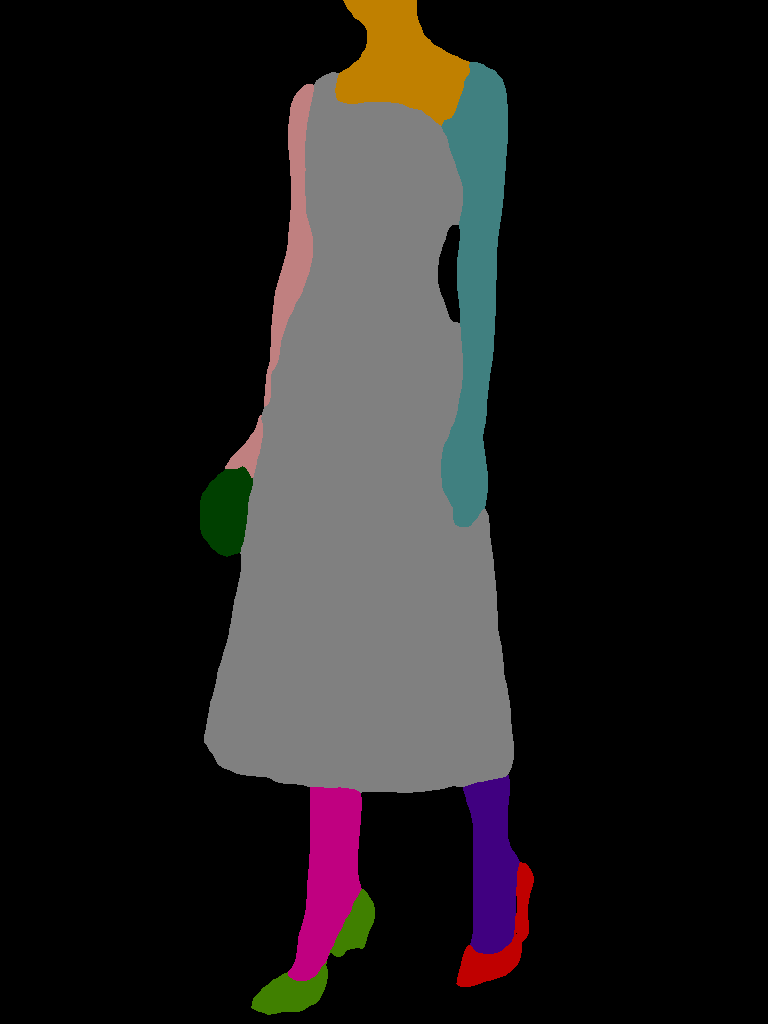

In [24]:
im_parse

In [25]:
label_array = np.array(im_parse)

In [26]:
np.unique(label_array)

array([ 0,  7,  9, 10, 11, 12, 13, 14, 15, 16], dtype=uint8)

In [27]:
parse_dress_belt = ((label_array == 7).astype(np.float32) + (label_array == 8).astype(np.float32))

In [28]:
agnostic = im_parse.copy()

In [29]:
agnostic.paste(0, None, Image.fromarray(np.uint8(parse_dress_belt * 255), 'L'))

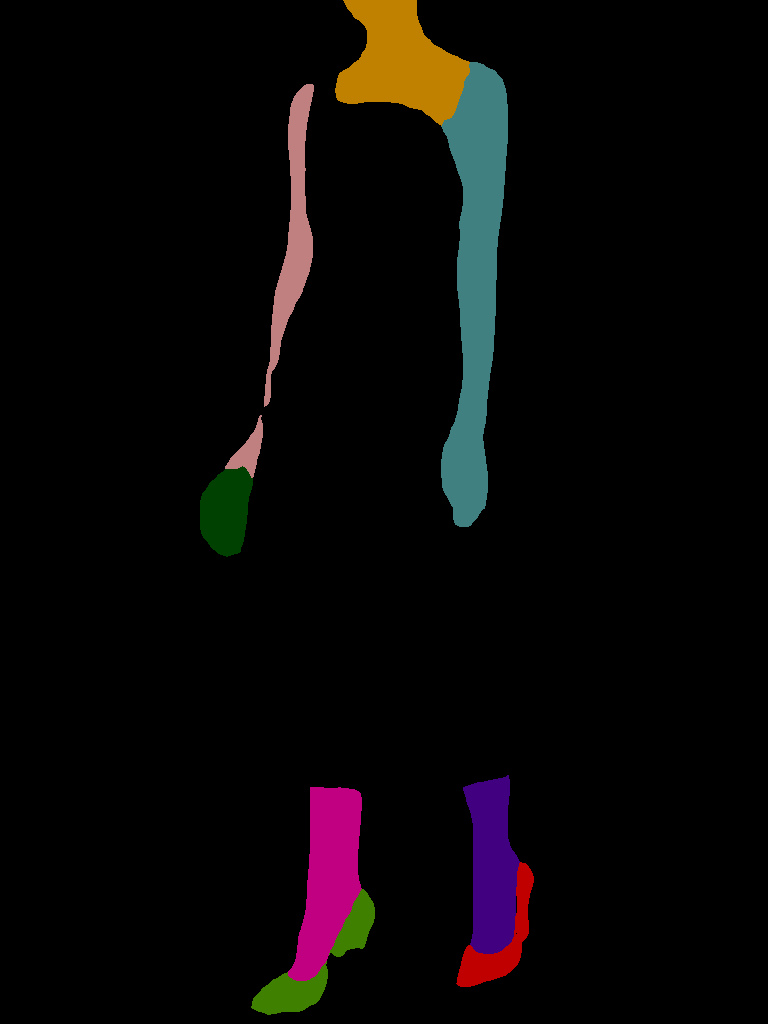

In [30]:
agnostic

In [34]:
agnostic.size

(768, 1024)

In [52]:
# Dresscode는 얼굴 부분이 없어서 키포인트가 적게 나옴 : 24개
# 그래도 사용할 수 있을까?
pose = '/home/aiteam/tykim/generative_model/human/HR-VITON/data/dresscode/dresses/keypoints/020714_2.json'

with open(pose, 'r') as f:
  pose_label = json.load(f)
  pose_data = pose_label['keypoints']
  print(pose_data)
  pose_data = np.array(pose_data)
  pose_data = pose_data[:,0:2]

[[182.0, 0.0, 0.4219032824039459, 0.0], [194.0, 48.0, 0.9112306237220764, 1.0], [156.0, 50.0, 0.9192137718200684, 2.0], [150.0, 127.0, 0.8929301500320435, 3.0], [133.0, 205.0, 0.8509893417358398, 4.0], [234.0, 45.0, 0.9119172096252441, 5.0], [239.0, 130.0, 0.8665018081665039, 6.0], [236.0, 209.0, 0.9650828838348389, 7.0], [162.0, 190.0, 0.7959058880805969, 8.0], [155.0, 311.0, 0.6916852593421936, 9.0], [166.0, 431.0, 0.7965878844261169, 10.0], [212.0, 193.0, 0.7552569508552551, 11.0], [223.0, 307.0, 0.7692214250564575, 12.0], [247.0, 421.0, 0.8243775963783264, 13.0], [175.0, 0.0, 0.27052849531173706, 14.0], [189.0, 0.0, 0.3116936683654785, 15.0], [173.0, 0.0, 0.14027343690395355, 16.0], [201.0, 0.0, 0.4154766798019409, 17.0]]


In [59]:
pose_data*2

array([[364.,   0.],
       [388.,  96.],
       [312., 100.],
       [300., 254.],
       [266., 410.],
       [468.,  90.],
       [478., 260.],
       [472., 418.],
       [324., 380.],
       [310., 622.],
       [332., 862.],
       [424., 386.],
       [446., 614.],
       [494., 842.],
       [350.,   0.],
       [378.,   0.],
       [346.,   0.],
       [402.,   0.]])

In [54]:
from PIL import Image, ImageDraw

In [55]:
pose_data.shape[1]

2

In [60]:
draw = ImageDraw.Draw(agnostic)

for (x, y) in pose_data*2:
  print()
  draw.ellipse((x-5, y-5, x+5, y+5), fill=(255, 0, 0))
  
  

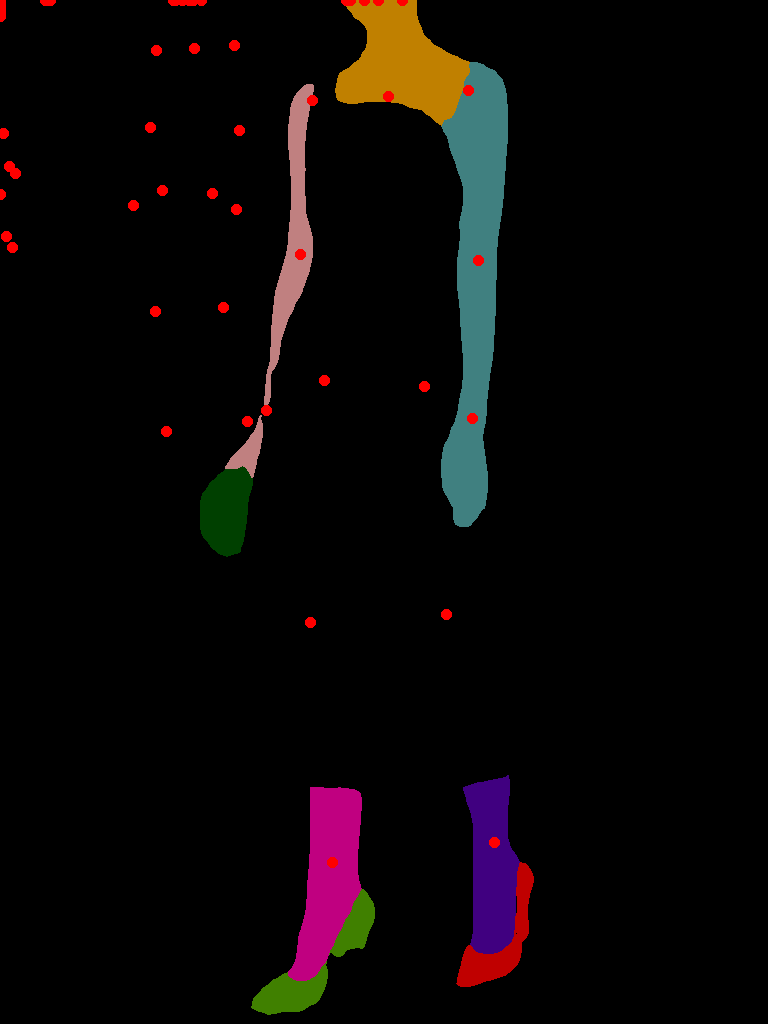

In [61]:
agnostic

In [70]:
for (x, y) in [pose_data[2]*2, pose_data[3]*2, pose_data[4]*2]:
  draw.ellipse((x-5, y-5, x+5, y+5), fill=(0, 255, 0))

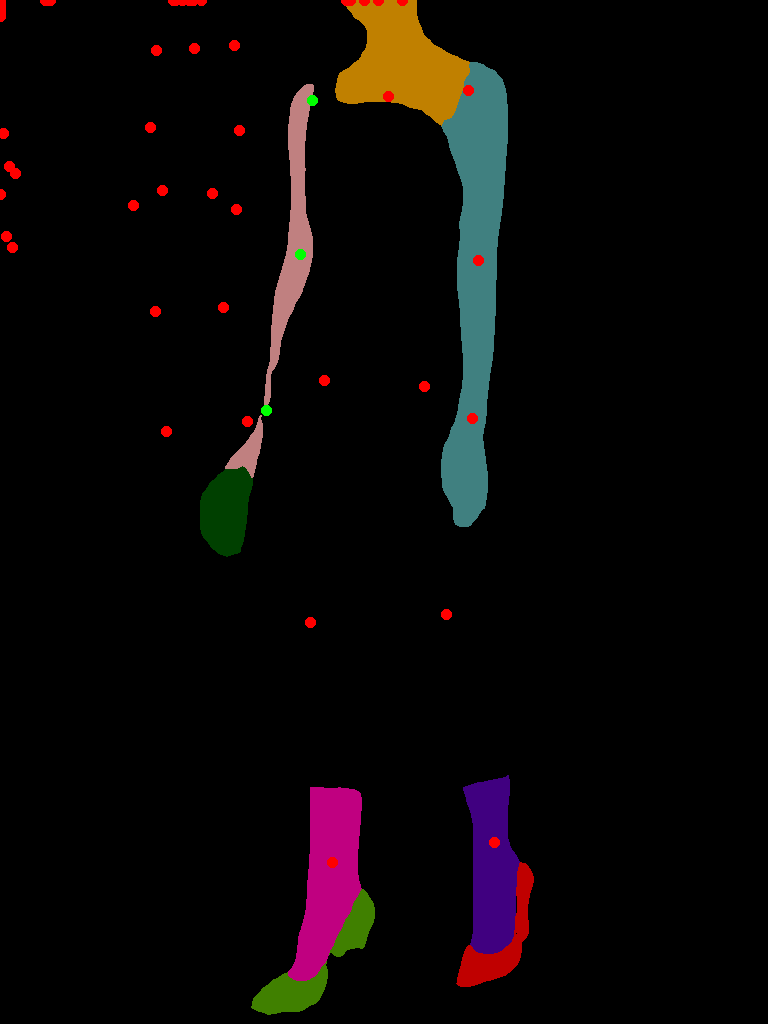

In [71]:
agnostic

In [76]:
pose_data

array([[182.,   0.],
       [194.,  48.],
       [156.,  50.],
       [150., 127.],
       [133., 205.],
       [234.,  45.],
       [239., 130.],
       [236., 209.],
       [162., 190.],
       [155., 311.],
       [166., 431.],
       [212., 193.],
       [223., 307.],
       [247., 421.],
       [175.,   0.],
       [189.,   0.],
       [173.,   0.],
       [201.,   0.]])

In [78]:
pose_data=pose_data*2

In [79]:
w=768
h=1024
r = 10

for parse_id, pose_ids in [(14, [2, 5, 6, 7]), (15, [5, 2, 3, 4])]:
    # 14번에서 [2,5,6,7]
    mask_arm = Image.new('L', (w, h), 'black')
    mask_arm_draw = ImageDraw.Draw(mask_arm)
    i_prev = pose_ids[0] # i_prev 처음엔 2
    for i in pose_ids[1:]:
        # i_prev가 keypoint를 나타내는 듯
        # 키포인트 값이 없으면 무시
        if (pose_data[i_prev, 0] == 0.0 and pose_data[i_prev, 1] == 0.0) or (pose_data[i, 0] == 0.0 and pose_data[i, 1] == 0.0):
            continue

        # key point가 있는 곳 두 점을 이어서 라인을 만듬
        mask_arm_draw.line([tuple(pose_data[j]) for j in [i_prev, i]], 'white', width=r*10) # [2, 5]
        pointx, pointy = pose_data[i]
        radius = r*4 if i == pose_ids[-1] else r*15
        mask_arm_draw.ellipse((pointx-radius, pointy-radius, pointx+radius, pointy+radius), 'white', 'white')
        i_prev = i
    parse_arm = (np.array(mask_arm) / 255) * (label_array == parse_id).astype(np.float32)
    agnostic.paste(0, None, Image.fromarray(np.uint8(parse_arm * 255), 'L'))

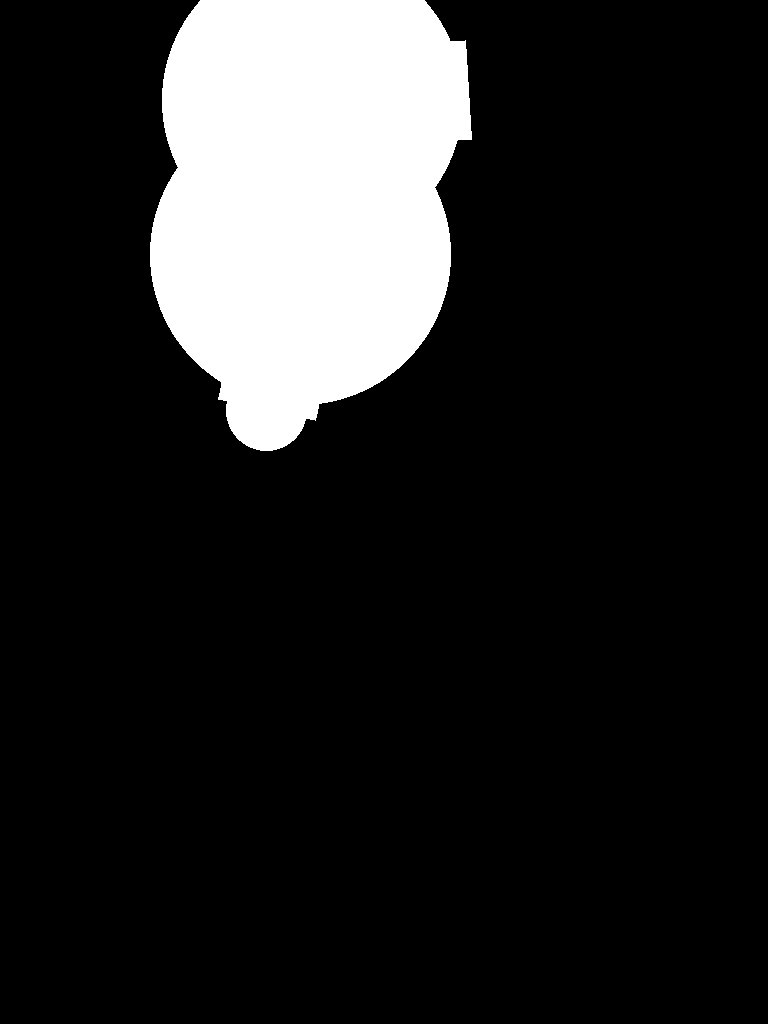

In [80]:
mask_arm

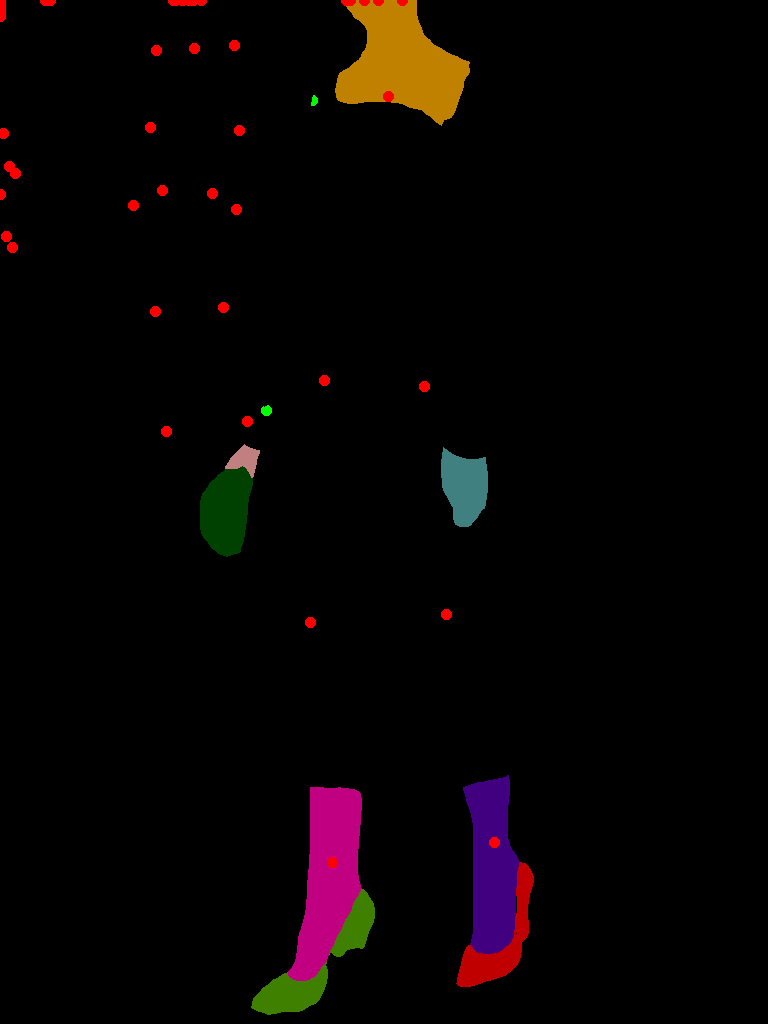

In [81]:
agnostic

In [ ]:
for (x, y) in [pose_data[2]*2, pose_data[3]*2, pose_data[4]*2]:
  draw.ellipse((x-5, y-5, x+5, y+5), fill=(0, 255, 0))

In [ ]:
from PIL import Image, ImageDraw
import numpy as np

# Load the image
img = Image.open("path/to/image.jpg")

# Load the keypoint data
keypoints = np.load("path/to/keypoints.npy")

# Create a drawing context
draw = ImageDraw.Draw(img)

# Loop through each keypoint and draw a circle around it
for i in range(keypoints.shape[1]):
    x, y = keypoints[:, i]
    draw.ellipse((x-5, y-5, x+5, y+5), fill=(255, 0, 0))

# Save the image with keypoints drawn
img.save("path/to/output.jpg")


In [ ]:
# 14번 left-arm
# 15번 right-arm
# 2-Hair
# 5-Upper-clothes
# 6-Dress
# 7-Coat
# 3-Glove
# 4-Sunglasses


# 14번 left-arm
# 15번 right-arm
# 2-Hair
# 4-upper-clothes
# 7- dress
# 3-sunglasses


w=768
h=1024
r=10
for parse_id, pose_ids in [(14, [2, 4, 7]), (15, [4, 2, 3])]:
    # 14번에서 [2,5,6,7]
    mask_arm = Image.new('L', (w, h), 'black')
    mask_arm_draw = ImageDraw.Draw(mask_arm)
    i_prev = pose_ids[0] # i_prev 처음엔 2
    for i in pose_ids[1:]:
        # i_prev가 keypoint를 나타내는 듯
        # 키포인트 값이 없으면 무시
        if (pose_data[i_prev, 0] == 0.0 and pose_data[i_prev, 1] == 0.0) or (pose_data[i, 0] == 0.0 and pose_data[i, 1] == 0.0):
            continue

        # key point가 있는 곳 두 점을 이어서 라인을 만듬
        mask_arm_draw.line([tuple(pose_data[j]) for j in [i_prev, i]], 'white', width=r*10) # [2, 5]
        pointx, pointy = pose_data[i]
        radius = r*4 if i == pose_ids[-1] else r*15
        mask_arm_draw.ellipse((pointx-radius, pointy-radius, pointx+radius, pointy+radius), 'white', 'white')
        i_prev = i
    parse_arm = (np.array(mask_arm) / 255) * (label_array == parse_id).astype(np.float32)
    agnostic.paste(0, None, Image.fromarray(np.uint8(parse_arm * 255), 'L'))